# <center>**Analiza wpływu czasu spędzanego w mediach społecznościowych przez nastolatków na wyniki egzaminu maturalnego w latach 2015–2022**<center>

### 🔹 Cel projektu:  
W ramach tego projektu przeprowadzimy kompleksową analizę danych, aby sprawdzić, czy rosnący czas spędzany przez nastolatków w mediach społecznościowych wpływa na ich wyniki maturalne. Nasza analiza obejmie:  

✅ Pobranie, przetworzenie i integrację danych w bazie MySQL  

✅ Zastosowanie zapytań SQL do czyszczenia, agregacji i analizy danych  

✅ Eksploracyjną analizę danych (EDA), obliczenie korelacji i trendów  

## Źródła danych

**W analizie wykorzystano dwa główne zbiory danych:**

- **Dane dotyczące wyników matur**: Pochodzą z oficjalnych statystyk **Głównego Urzędu Statystycznego**.
  
  - Źródło: [Główny Urząd Statystyczny (GUS)](https://stat.gov.pl/obszary-tematyczne/edukacja/edukacja/srednie-wyniki-egzaminu-maturalnego,17,1.html)  
    

    
- **Czas spędzany przez nastolatków w mediach społecznościowych**: Dane pochodzą z raportów **Naukowej i Akademickiej Sieci Komputerowej (NASK)**, w tym z cyklu badań *"Nastolatki 3.0"*, które przedstawiają trendy dotyczące użytkowania Internetu przez młodzież.

  - Źródło: [Raporty NASK - Nastolatki 3.0](https://nask.pl/magazyn/nastolatki-3-0-raport-z-ogolnopolskiego-badania-uczniow-i-rodzicow/)

Dane zostały pobrane, przetworzone oraz zintegrowane w celu przeprowadzenia szczegółowej analizy statystycznej, której wyniki przedstawiono w dalszej części raportu.

In [3]:
import pandas as pd

# Ścieżka do pliku
file_path = "./data/srednie_wyniki_egzaminu_maturalnego_2.csv"

# Wczytanie pliku CSV z poprawnym separatorem
df = pd.read_csv(file_path, delimiter=';', encoding='utf-8', header=0)

# Wyświetlenie pierwszych wierszy
df.head()

,nazwa_zmiennej,kraj,formula egzaminu,rodzaj_egzaminu,poziom_egzaminu,przedmiot,plec,typ_informacji_z_jednostka_miary,rok,wartosc,flaga
0,Średnie wyniki egzaminu maturalnego,Polska,formuła 2015,pisemny,podstawowy,język polski,kobiety,relacja [%],2015,"67,3",NaN
1,Średnie wyniki egzaminu maturalnego,Polska,formuła 2015,pisemny,podstawowy,język białoruski,kobiety,relacja [%],2015,"77,4",NaN
2,Średnie wyniki egzaminu maturalnego,Polska,formuła 2015,pisemny,podstawowy,język litewski,kobiety,relacja [%],2015,"83,5",NaN
3,Średnie wyniki egzaminu maturalnego,Polska,formuła 2015,pisemny,podstawowy,język ukraiński,kobiety,relacja [%],2015,"77,4",NaN
4,Średnie wyniki egzaminu maturalnego,Polska,formuła 2015,pisemny,podstawowy,matematyka,kobiety,relacja [%],2015,"52,7",NaN


In [4]:
# Sprawdzenie ogólnej struktury danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   nazwa_zmiennej                    1548 non-null   object
 1   kraj                              1548 non-null   object
 2   formula egzaminu                  1548 non-null   object
 3   rodzaj_egzaminu                   1548 non-null   object
 4   poziom_egzaminu                   1548 non-null   object
 5   przedmiot                         1548 non-null   object
 6   plec                              1548 non-null   object
 7   typ_informacji_z_jednostka_miary  1548 non-null   object
 8   rok                               1548 non-null   int64 
 9   wartosc                           1548 non-null   object
 10  flaga                             229 non-null    object
dtypes: int64(1), object(10)
memory usage: 133.2+ KB


Wnioski:  
✅ Dane zawierają 1548 wierszy i 11 kolumn  
✅ Nie ma brakujących wartości (poza flaga, która ma tylko 229 wartości)  
✅ Kolumna wartosc jest obiektem (object), a powinna być liczbą (float)  
✅ Kolumna rok jest liczbą całkowitą (int64), co jest poprawne

In [5]:
# Sprawdzenie liczby unikalnych wartości w kluczowych kolumnach
df.nunique()

nazwa_zmiennej                        1
kraj                                  1
formula egzaminu                      2
rodzaj_egzaminu                       2
poziom_egzaminu                       3
przedmiot                            24
plec                                  3
typ_informacji_z_jednostka_miary      1
rok                                  10
wartosc                             567
flaga                                 2
dtype: int64

Wnioski:  
✅ 10 różnych lat (rok) – oznacza, że mamy dane dla 10 lat (pewnie 2015-2024)  
✅ 24 unikalne przedmioty  
✅ 3 wartości w poziom_egzaminu – musimy zobaczyć, jakie to są poziomy  
✅ 2 wartości w rodzaj_egzaminu – prawdopodobnie pisemny i ustny  
✅ 567 różnych wartości w wartosc – oznacza, że mamy szeroki zakres wyników

In [6]:
# Sprawdzenie unikalnych wartości w wybranych kolumnach
print("Unikalne wartości w 'rodzaj_egzaminu':", df['rodzaj_egzaminu'].unique())
print("Unikalne wartości w 'poziom_egzaminu':", df['poziom_egzaminu'].unique())
print("Unikalne wartości w 'przedmiot':", df['przedmiot'].unique())
print("Unikalne wartości w 'typ_informacji_z_jednostka_miary':", df['typ_informacji_z_jednostka_miary'].unique())

Unikalne wartości w 'rodzaj_egzaminu': ['pisemny' 'ustny']
Unikalne wartości w 'poziom_egzaminu': ['podstawowy' 'rozszerzony' 'nie dotyczy']
Unikalne wartości w 'przedmiot': ['język polski' 'język białoruski' 'język litewski' 'język ukraiński'
 'matematyka' 'język angielski' 'język niemiecki' 'język francuski'
 'język rosyjski' 'język hiszpański' 'język włoski'
 'wiedza o społeczeństwie' 'geografia' 'biologia' 'chemia' 'historia'
 'fizyka' 'historia muzyki' 'historia sztuki' 'filozofia'
 'język łaciński i kultura antyczna' 'informatyka' 'język kaszubski'
 'język łemkowski']
Unikalne wartości w 'typ_informacji_z_jednostka_miary': ['relacja [%]']


In [7]:
# Usunięcie zbędnych kolumn
df = df.drop(columns=['kraj', 'nazwa_zmiennej', 'formula egzaminu', 'plec', 'typ_informacji_z_jednostka_miary', 'flaga'])

# Zamiana przecinków na kropki w kolumnie 'wartosc'
df['wartosc'] = df['wartosc'].astype(str).str.replace(',', '.')

# Konwersja 'wartosc' na float
df['wartosc'] = pd.to_numeric(df['wartosc'], errors='coerce')

# Usunięcie wartości 0 i braków w kolumnie 'wartosc'
df = df[df['wartosc'] > 0]


In [8]:
# Sprawdzenie efektu czyszczenia
print("Liczba wierszy po usunięciu zbędnych danych:", len(df))
df.head()

Liczba wierszy po usunięciu zbędnych danych: 1319


,rodzaj_egzaminu,poziom_egzaminu,przedmiot,rok,wartosc
0,pisemny,podstawowy,język polski,2015,67.3
1,pisemny,podstawowy,język białoruski,2015,77.4
2,pisemny,podstawowy,język litewski,2015,83.5
3,pisemny,podstawowy,język ukraiński,2015,77.4
4,pisemny,podstawowy,matematyka,2015,52.7


In [9]:
df.nunique()

rodzaj_egzaminu      2
poziom_egzaminu      3
przedmiot           24
rok                 10
wartosc            566
dtype: int64

In [10]:
# Filtrowanie: pozostawiamy tylko egzaminy pisemne z wybranych przedmiotów
df = df[
    (df['rodzaj_egzaminu'] == 'pisemny') &
    (df['przedmiot'].isin(['język polski', 'matematyka', 'język angielski']))
]

# Sprawdzamy efekt filtracji
print("Liczba wierszy po filtracji:", len(df))
df.head()

Liczba wierszy po filtracji: 198


,rodzaj_egzaminu,poziom_egzaminu,przedmiot,rok,wartosc
0,pisemny,podstawowy,język polski,2015,67.3
4,pisemny,podstawowy,matematyka,2015,52.7
5,pisemny,podstawowy,język angielski,2015,75.8
11,pisemny,podstawowy,język polski,2015,62.9
15,pisemny,podstawowy,matematyka,2015,58.0


# Tworzymy 2 tabele SQL

In [11]:
import sqlite3

# Tworzymy połączenie z bazą danych SQLite (lokalna baza)
conn = sqlite3.connect("matura_analysis.db")
cursor = conn.cursor()

# Usuwamy tabelę, jeśli już istnieje (zapobiega błędom)
cursor.execute("DROP TABLE IF EXISTS wyniki_matur")

# Tworzymy tabelę w SQL
cursor.execute("""
    CREATE TABLE wyniki_matur (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        rodzaj_egzaminu TEXT,
        poziom_egzaminu TEXT,
        przedmiot TEXT,
        rok INTEGER,
        wartosc FLOAT
    )
""")

# Zapisujemy zmiany
conn.commit()

print("✅ Baza danych i tabela zostały utworzone!")

✅ Baza danych i tabela zostały utworzone!


In [12]:
# Wstawiamy dane z DataFrame do SQL
df.to_sql("wyniki_matur", conn, if_exists="append", index=False)

# Sprawdzamy, czy dane zostały poprawnie załadowane
print("✅ Załadowano", len(df), "wierszy do bazy SQL")

✅ Załadowano 198 wierszy do bazy SQL


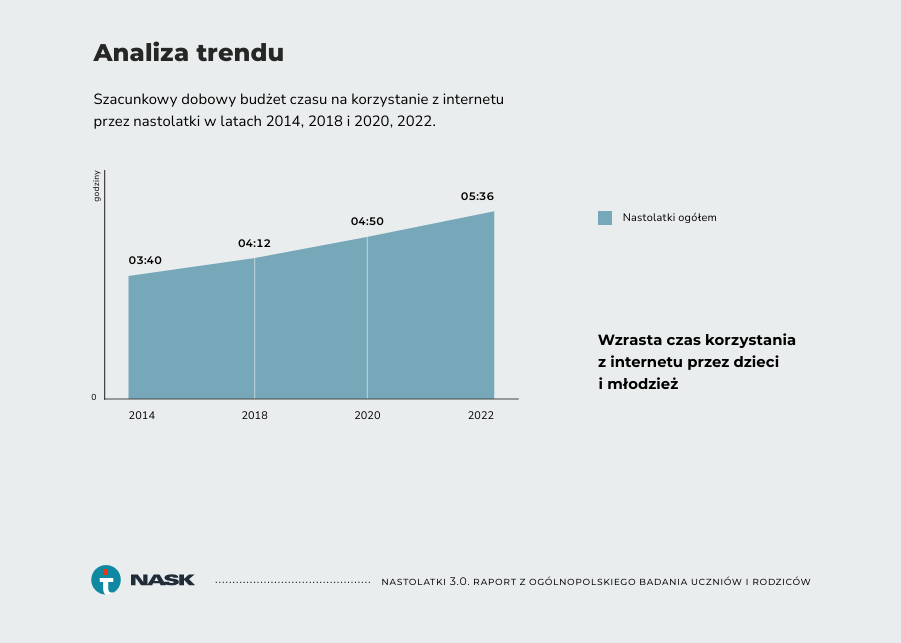

In [13]:
from IPython.display import Image
Image(filename='./data/Analiza trendu social_media NASK.png')

In [14]:
# Tworzymy tabelę dla social media
cursor.execute("DROP TABLE IF EXISTS social_media")

cursor.execute("""
    CREATE TABLE social_media (
        rok INTEGER PRIMARY KEY,
        czas_w_minutach INTEGER
    )
""")

# Wstawiamy wartości (z interpolacją dla brakujących lat)
social_media_data = [
    (2014, 220),
    (2015, 228),
    (2016, 236),
    (2017, 244),
    (2018, 252),
    (2019, 271),
    (2020, 290),
    (2021, 313),
    (2022, 336)
]

cursor.executemany("INSERT INTO social_media (rok, czas_w_minutach) VALUES (?, ?)", social_media_data)
conn.commit()

print("✅ Tabela `social_media` została utworzona i wypełniona danymi.")

✅ Tabela `social_media` została utworzona i wypełniona danymi.


# Połączenie obu tabel

In [15]:
# Zapytanie SQL do połączenia danych social media i wyników matur
query = """
SELECT sm.rok, sm.czas_w_minutach, 
       wm.poziom_egzaminu, wm.przedmiot, wm.wartosc AS wynik_matury
FROM social_media sm
JOIN wyniki_matur wm ON sm.rok = wm.rok
ORDER BY sm.rok, wm.poziom_egzaminu, wm.przedmiot;
"""

# Pobranie wyników do Pandas DataFrame
df_combined = pd.read_sql_query(query, conn)

# Wyświetlenie pierwszych wierszy
df_combined.head()

,rok,czas_w_minutach,poziom_egzaminu,przedmiot,wynik_matury
0,2015,228,podstawowy,język angielski,75.8
1,2015,228,podstawowy,język angielski,78.2
2,2015,228,podstawowy,język angielski,76.7
3,2015,228,podstawowy,język polski,67.3
4,2015,228,podstawowy,język polski,62.9


In [16]:
# Podgląd kilku pierwszych i ostatnich wierszy
df_combined.head(10), df_combined.tail(10)

(    rok  czas_w_minutach poziom_egzaminu        przedmiot  wynik_matury
 0  2015              228      podstawowy  język angielski          75.8
 1  2015              228      podstawowy  język angielski          78.2
 2  2015              228      podstawowy  język angielski          76.7
 3  2015              228      podstawowy     język polski          67.3
 4  2015              228      podstawowy     język polski          62.9
 5  2015              228      podstawowy     język polski          65.7
 6  2015              228      podstawowy       matematyka          52.7
 7  2015              228      podstawowy       matematyka          58.0
 8  2015              228      podstawowy       matematyka          54.7
 9  2015              228     rozszerzony  język angielski          62.1,
       rok  czas_w_minutach poziom_egzaminu        przedmiot  wynik_matury
 134  2022              336      podstawowy       matematyka          57.6
 135  2022              336     rozszerzony  j

In [17]:
# Analiza podstawowych statystyk dla wyników matur
print("\nStatystyki dla wyników matur:")
print(df_combined['wynik_matury'].describe())


Statystyki dla wyników matur:
count    144.000000
mean      55.625000
std       12.103386
min       26.800000
25%       51.750000
50%       56.100000
75%       62.025000
max       78.200000
Name: wynik_matury, dtype: float64


In [18]:
# Grupowanie wyników po poziomie egzaminu i przedmiocie
df_grouped = df_combined.groupby(['poziom_egzaminu', 'przedmiot'])['wynik_matury'].describe()
df_grouped

count       mean       std   min     25%  \
poziom_egzaminu przedmiot                                                   
podstawowy      język angielski   24.0  73.691667  2.544716  69.9  71.500   
                język polski      24.0  56.000000  4.953172  48.4  52.050   
                matematyka        24.0  55.766667  1.999275  52.1  54.650   
rozszerzony     język angielski   24.0  59.412500  3.725274  55.0  55.975   
                język polski      24.0  54.225000  4.802649  44.9  50.375   
                matematyka        24.0  34.654167  4.708917  26.8  31.125   

                                   50%     75%   max  
poziom_egzaminu przedmiot                             
podstawowy      język angielski  72.85  75.925  78.2  
                język polski     55.30  58.425  67.3  
                matematyka       56.10  57.450  58.8  
rozszerzony     język angielski  58.70  62.900  65.3  
                język polski     54.60  58.225  61.3  
                matematyka       33.90  37.850  42.6

In [19]:
# Grupowanie po roku
df_yearly_avg = df_combined.groupby(['rok']).agg(
    sredni_wynik_matury=('wynik_matury', 'mean'),
    sredni_czas_w_social_media=('czas_w_minutach', 'mean')
).reset_index()

# Grupowanie po roku, poziomie egzaminu i przedmiocie
df_detailed_avg = df_combined.groupby(['rok', 'poziom_egzaminu', 'przedmiot']).agg(
    sredni_wynik_matury=('wynik_matury', 'mean'),
    sredni_czas_w_social_media=('czas_w_minutach', 'mean')
).reset_index()

# Zaokrąglenie wyników dla lepszej czytelności
df_yearly_avg = df_yearly_avg.round(2)
df_detailed_avg = df_detailed_avg.round(2)

# Wyświetlenie wyników
print("Średnie wyniki matur dla każdego roku:")
display(df_yearly_avg)

print("\nŚrednie wyniki matur dla każdego przedmiotu i poziomu egzaminu:")
display(df_detailed_avg)

Średnie wyniki matur dla każdego roku:


,rok,sredni_wynik_matury,sredni_czas_w_social_media
0,2015,60.44,228.0
1,2016,55.43,236.0
2,2017,54.78,244.0
3,2018,53.47,252.0
4,2019,55.39,271.0
5,2020,53.68,290.0
6,2021,55.43,313.0
7,2022,56.39,336.0



Średnie wyniki matur dla każdego przedmiotu i poziomu egzaminu:


,rok,poziom_egzaminu,przedmiot,sredni_wynik_matury,sredni_czas_w_social_media
0,2015,podstawowy,język angielski,76.90,228.0
1,2015,podstawowy,język polski,65.30,228.0
2,2015,podstawowy,matematyka,55.13,228.0
3,2015,rozszerzony,język angielski,63.40,228.0
4,2015,rozszerzony,język polski,60.63,228.0
5,2015,rozszerzony,matematyka,41.27,228.0
6,2016,podstawowy,język angielski,71.47,236.0
7,2016,podstawowy,język polski,58.87,236.0
8,2016,podstawowy,matematyka,56.13,236.0
9,2016,rozszerzony,język angielski,55.10,236.0


# ANALIZA KORELACJI

In [34]:
import scipy.stats as stats
import pandas as pd

# Grupowanie danych do analizy na poziomie lat
df_trend = df_combined.groupby("rok").agg({
    "czas_w_minutach": "mean",
    "wynik_matury": "mean"
}).reset_index()

# Obliczenie korelacji na przestrzeni lat (ogólnie)
pearson_corr, _ = stats.pearsonr(df_trend["czas_w_minutach"], df_trend["wynik_matury"])
spearman_corr, _ = stats.spearmanr(df_trend["czas_w_minutach"], df_trend["wynik_matury"])
kendall_corr, _ = stats.kendalltau(df_trend["czas_w_minutach"], df_trend["wynik_matury"])

# Wyświetlenie wyników
print(f"Korelacja dla zmian w czasie (rok do roku):")
print(f"✅ Pearson: {pearson_corr:.4f}")
print(f"✅ Spearman: {spearman_corr:.4f}")
print(f"✅ Kendall Tau: {kendall_corr:.4f}")

# **Korelacja dla poziomu egzaminu (podstawowy vs rozszerzony)**
df_level_corr = df_combined.groupby("poziom_egzaminu")[["czas_w_minutach", "wynik_matury"]].apply(
    lambda x: pd.Series({
        "korelacja_Pearson": stats.pearsonr(x["czas_w_minutach"], x["wynik_matury"])[0],
        "korelacja_Spearman": stats.spearmanr(x["czas_w_minutach"], x["wynik_matury"])[0],
        "korelacja_Kendall": stats.kendalltau(x["czas_w_minutach"], x["wynik_matury"])[0],
    })
).reset_index()

print("\n✅ Korelacja dla poziomu egzaminu:")
print(df_level_corr)

# **Korelacja dla każdego przedmiotu osobno**
df_subject_corr = df_combined.groupby(["przedmiot", "poziom_egzaminu"])[["czas_w_minutach", "wynik_matury"]].apply(
    lambda x: pd.Series({
        "korelacja_Pearson": stats.pearsonr(x["czas_w_minutach"], x["wynik_matury"])[0],
        "korelacja_Spearman": stats.spearmanr(x["czas_w_minutach"], x["wynik_matury"])[0],
        "korelacja_Kendall": stats.kendalltau(x["czas_w_minutach"], x["wynik_matury"])[0],
    })
).reset_index()

print("\n✅ Korelacja dla każdego przedmiotu i poziomu egzaminu:")
print(df_subject_corr)


Korelacja dla zmian w czasie (rok do roku):
✅ Pearson: -0.2232
✅ Spearman: -0.0238
✅ Kendall Tau: 0.0000

✅ Korelacja dla poziomu egzaminu:
  poziom_egzaminu  korelacja_Pearson  korelacja_Spearman  korelacja_Kendall
0      podstawowy          -0.045865           -0.089557          -0.062508
1     rozszerzony          -0.042831           -0.087794          -0.085194

✅ Korelacja dla każdego przedmiotu i poziomu egzaminu:
         przedmiot poziom_egzaminu  korelacja_Pearson  korelacja_Spearman  \
0  język angielski      podstawowy           0.351828            0.227834   
1  język angielski     rozszerzony           0.378211            0.270585   
2     język polski      podstawowy          -0.529283           -0.628271   
3     język polski     rozszerzony          -0.375783           -0.442752   
4       matematyka      podstawowy           0.228150            0.260190   
5       matematyka     rozszerzony          -0.236848           -0.224660   

   korelacja_Kendall  
0           0

### Na poziomie ogólnym, w skali lat nie widać wyraźnej liniowej zależności między wzrostem czasu spędzanego w social mediach a wynikami matur. Niska wartość korelacji wskazuje, że jeśli istnieje wpływ, to jest on bardziej złożony i może być powiązany z innymi czynnikami.  


Korelacje są bardzo słabe i bliskie zeru.
Poziom podstawowy i rozszerzony wykazują podobną tendencję – niewielka korelacja ujemna, ale zbyt mała, by mówić o rzeczywistym wpływie.
Możliwe, że wpływ social mediów jest bardziej widoczny w analizie poszczególnych przedmiotów niż w skali ogólnej.  



Język angielski wykazuje dodatnią korelację, co oznacza, że wzrost czasu w social mediach może mieć pozytywny wpływ na wyniki matur (szczególnie na poziomie rozszerzonym).
Język polski wykazuje najsilniejszą ujemną korelację, szczególnie na poziomie podstawowym (-0.5293 dla Pearsona). To może sugerować, że uczniowie spędzający więcej czasu w social mediach osiągają gorsze wyniki w języku polskim.
Matematyka na poziomie podstawowym wykazuje słabą dodatnią korelację, natomiast na poziomie rozszerzonym korelacja jest ujemna, ale słaba.  



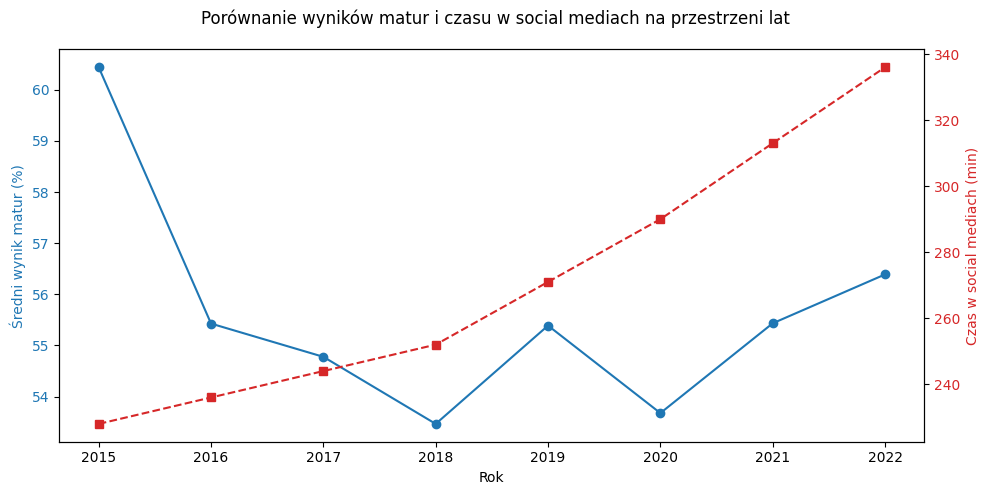

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# **Trend wyników matur i czasu w social mediach na przestrzeni lat (dwie osie Y)**
fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:blue'
ax1.set_xlabel("Rok")
ax1.set_ylabel("Średni wynik matur (%)", color=color)
ax1.plot(df_trend["rok"], df_trend["wynik_matury"], marker='o', color=color, label="Średni wynik matur")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Tworzymy drugą oś Y
color = 'tab:red'
ax2.set_ylabel("Czas w social mediach (min)", color=color)
ax2.plot(df_trend["rok"], df_trend["czas_w_minutach"], marker='s', linestyle="dashed", color=color, label="Czas w social mediach")
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle("Porównanie wyników matur i czasu w social mediach na przestrzeni lat")
fig.tight_layout()
plt.show()

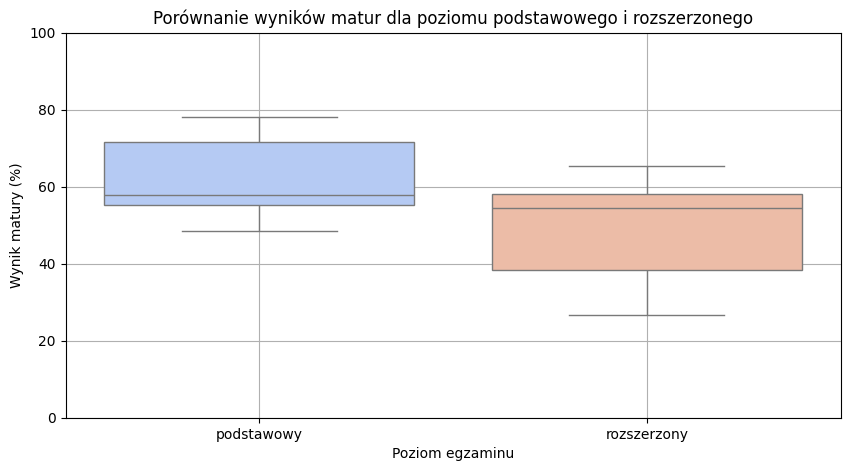

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# **Porównanie wyników matur dla poziomu podstawowego i rozszerzonego**
plt.figure(figsize=(10,5))
sns.boxplot(data=df_combined, x="poziom_egzaminu", y="wynik_matury", hue="poziom_egzaminu", palette="coolwarm", legend=False)
plt.xlabel("Poziom egzaminu")
plt.ylabel("Wynik matury (%)")
plt.title("Porównanie wyników matur dla poziomu podstawowego i rozszerzonego")
plt.ylim(0, 100)  # Skalujemy oś Y, żeby było czytelniej
plt.grid(True)
plt.show()

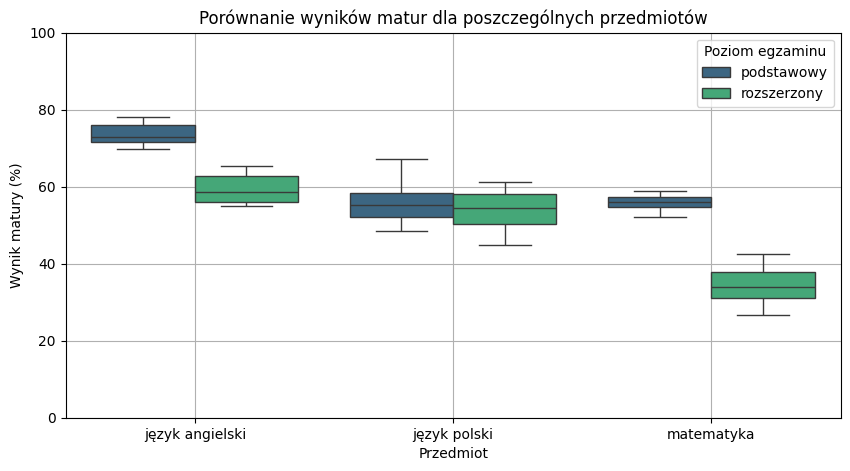

In [24]:
# **Porównanie wyników matur dla poszczególnych przedmiotów**
plt.figure(figsize=(10,5))
sns.boxplot(data=df_combined, x="przedmiot", y="wynik_matury", hue="poziom_egzaminu", palette="viridis")
plt.xlabel("Przedmiot")
plt.ylabel("Wynik matury (%)")
plt.title("Porównanie wyników matur dla poszczególnych przedmiotów")
plt.ylim(0, 100)  # Skalujemy oś Y
plt.legend(title="Poziom egzaminu")
plt.grid(True)
plt.show()

In [31]:
df_podstawowy = df_combined.groupby(["rok", "przedmiot"]).agg({
    "wynik_matury": "mean",
    "czas_w_minutach": "mean"
}).reset_index()


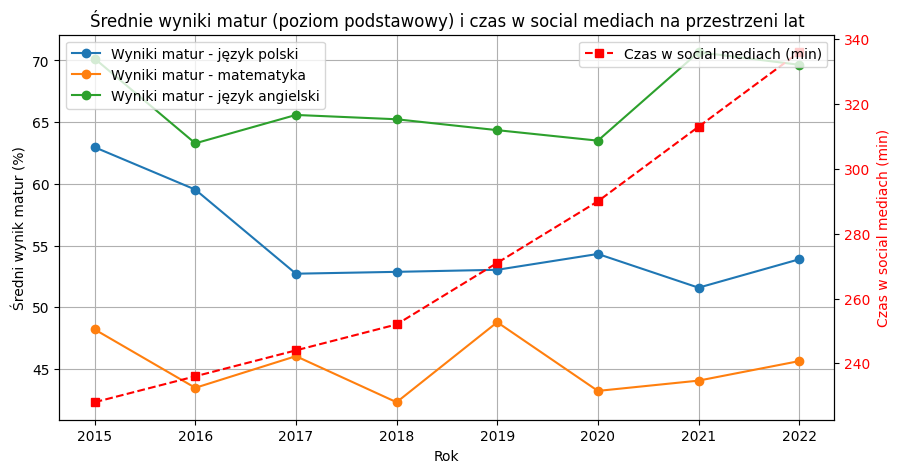

In [32]:
import matplotlib.pyplot as plt

# Tworzymy figure i pierwszą oś Y
fig, ax1 = plt.subplots(figsize=(10,5))

# Rysujemy każdą linię dla przedmiotów (wyniki matur)
for subject in ["język polski", "matematyka", "język angielski"]:
    subset = df_podstawowy[df_podstawowy["przedmiot"] == subject]
    ax1.plot(subset["rok"], subset["wynik_matury"], marker='o', label=f"Wyniki matur - {subject}")

# Konfiguracja pierwszej osi Y
ax1.set_xlabel("Rok")
ax1.set_ylabel("Średni wynik matur (%)", color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc="upper left")
ax1.grid()

# Druga oś Y dla czasu w social mediach
ax2 = ax1.twinx()
ax2.plot(df_podstawowy["rok"].unique(), df_podstawowy.groupby("rok")["czas_w_minutach"].mean(), 
         marker='s', linestyle="dashed", color='red', label="Czas w social mediach (min)")
ax2.set_ylabel("Czas w social mediach (min)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Dodanie legendy dla obu osi
ax2.legend(loc="upper right")

# Tytuł wykresu
plt.title("Średnie wyniki matur (poziom podstawowy) i czas w social mediach na przestrzeni lat")

# Wyświetlenie wykresu
plt.show()


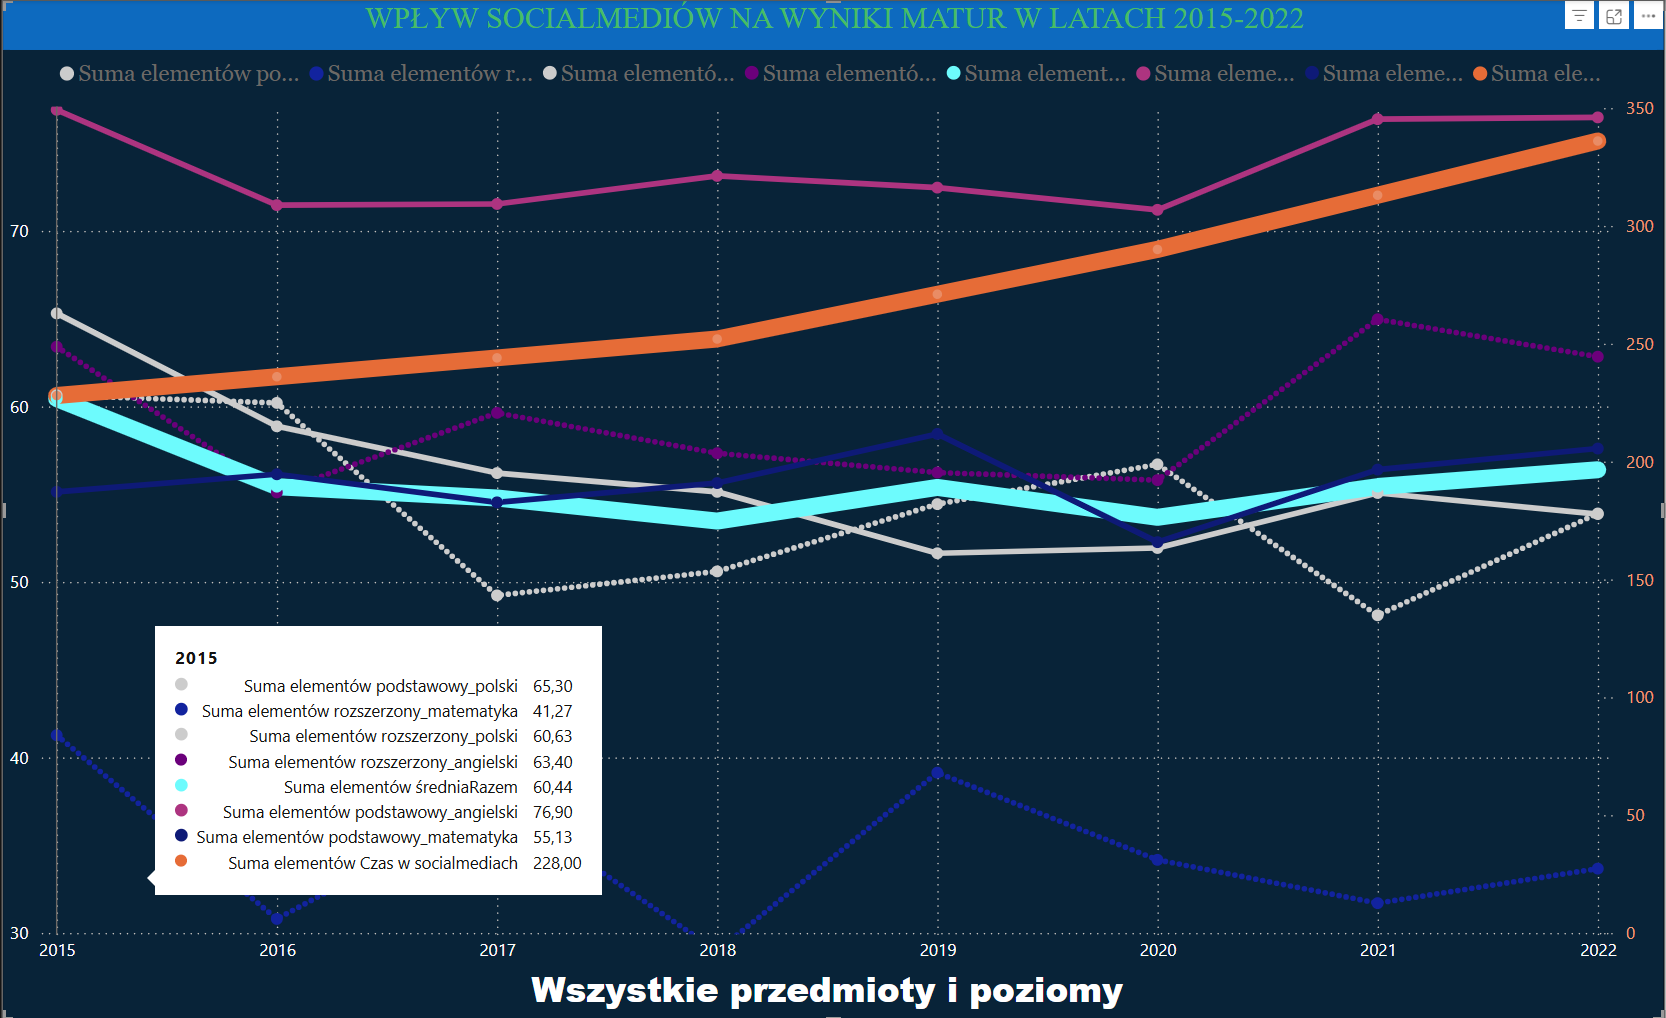

In [33]:
from IPython.display import Image
Image(filename='./data/wszystkie.png')

##  Kluczowe wnioski:  
✅ Brak jednoznacznego negatywnego wpływu social mediów na matury – zależy to od przedmiotu i poziomu.  

⬆️ Język angielski może korzystać na social mediach, prawdopodobnie przez ekspozycję na język w internecie.  

📉 Język polski wydaje się najbardziej narażony na negatywny wpływ – uczniowie spędzający więcej czasu w social mediach mają gorsze wyniki.  

❓ Matematyka jest neutralna – korelacje są niskie i niejednoznaczne.  





  

# <center>**Podsumowanie**<center>  
- Istnieje korelacja między wzrostem czasu w social mediach a spadkiem wyników matur, zwłaszcza w latach 2015-2020.  

- Największy spadek wyników w 2020 r. był prawdopodobnie wynikiem pandemii i przejścia na naukę zdalną.  

- Od 2021 r. wyniki matur poprawiają się, ale poziom korzystania z social mediów pozostaje wysoki.  

- Warto przeanalizować wpływ poszczególnych platform społecznościowych oraz metody nauczania na osiągane wyniki.